In [20]:
import os
import numpy as np 
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(52,12))
plt.rc('font', size=16)
plt.rc('lines', markersize=12)
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Omicron%20daily%20cases%20by%20country%20(COVID-19%20variant)/covid-variants.csv')
df.head(5)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [22]:
print(df.isna().sum())
print("Duplicated", df.duplicated().sum())

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64
Duplicated 0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [5]:
df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


In [6]:
df.columns

Index(['location', 'date', 'variant', 'num_sequences', 'perc_sequences',
       'num_sequences_total'],
      dtype='object')

In [23]:
df.head(5)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [8]:
df.shape

(100416, 6)

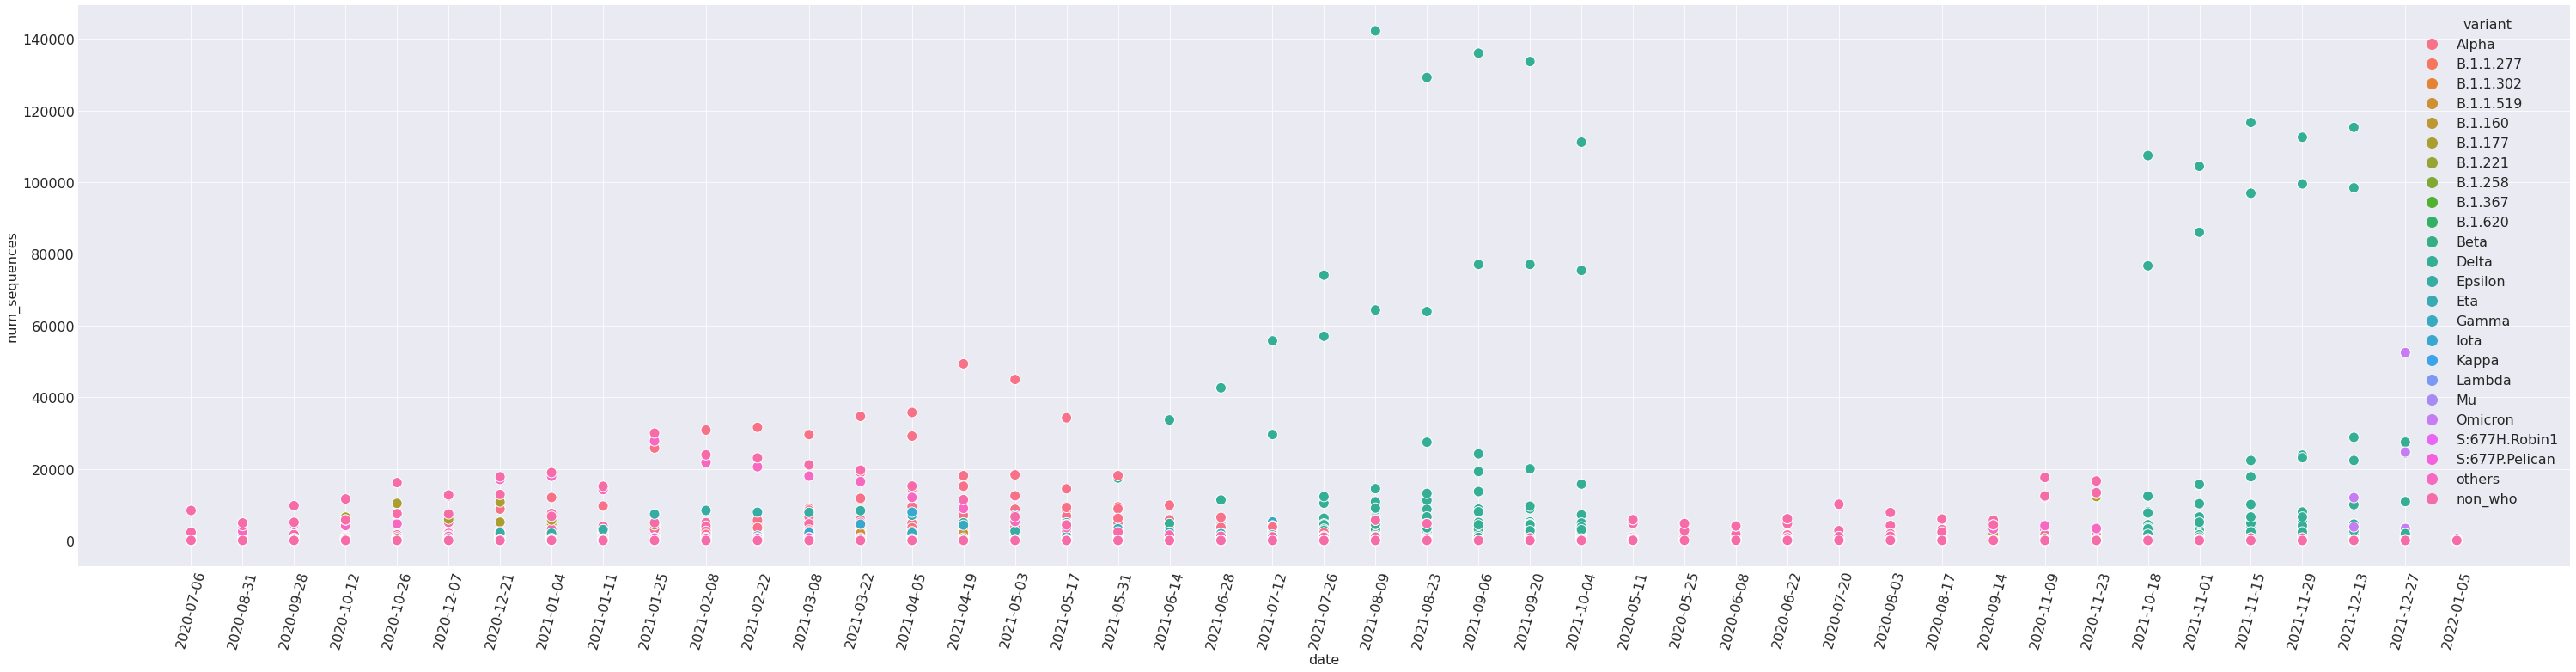

In [9]:
sns.scatterplot(df['date'], df["num_sequences"], hue=df['variant'])
plt.xticks(rotation=75)
plt.show()

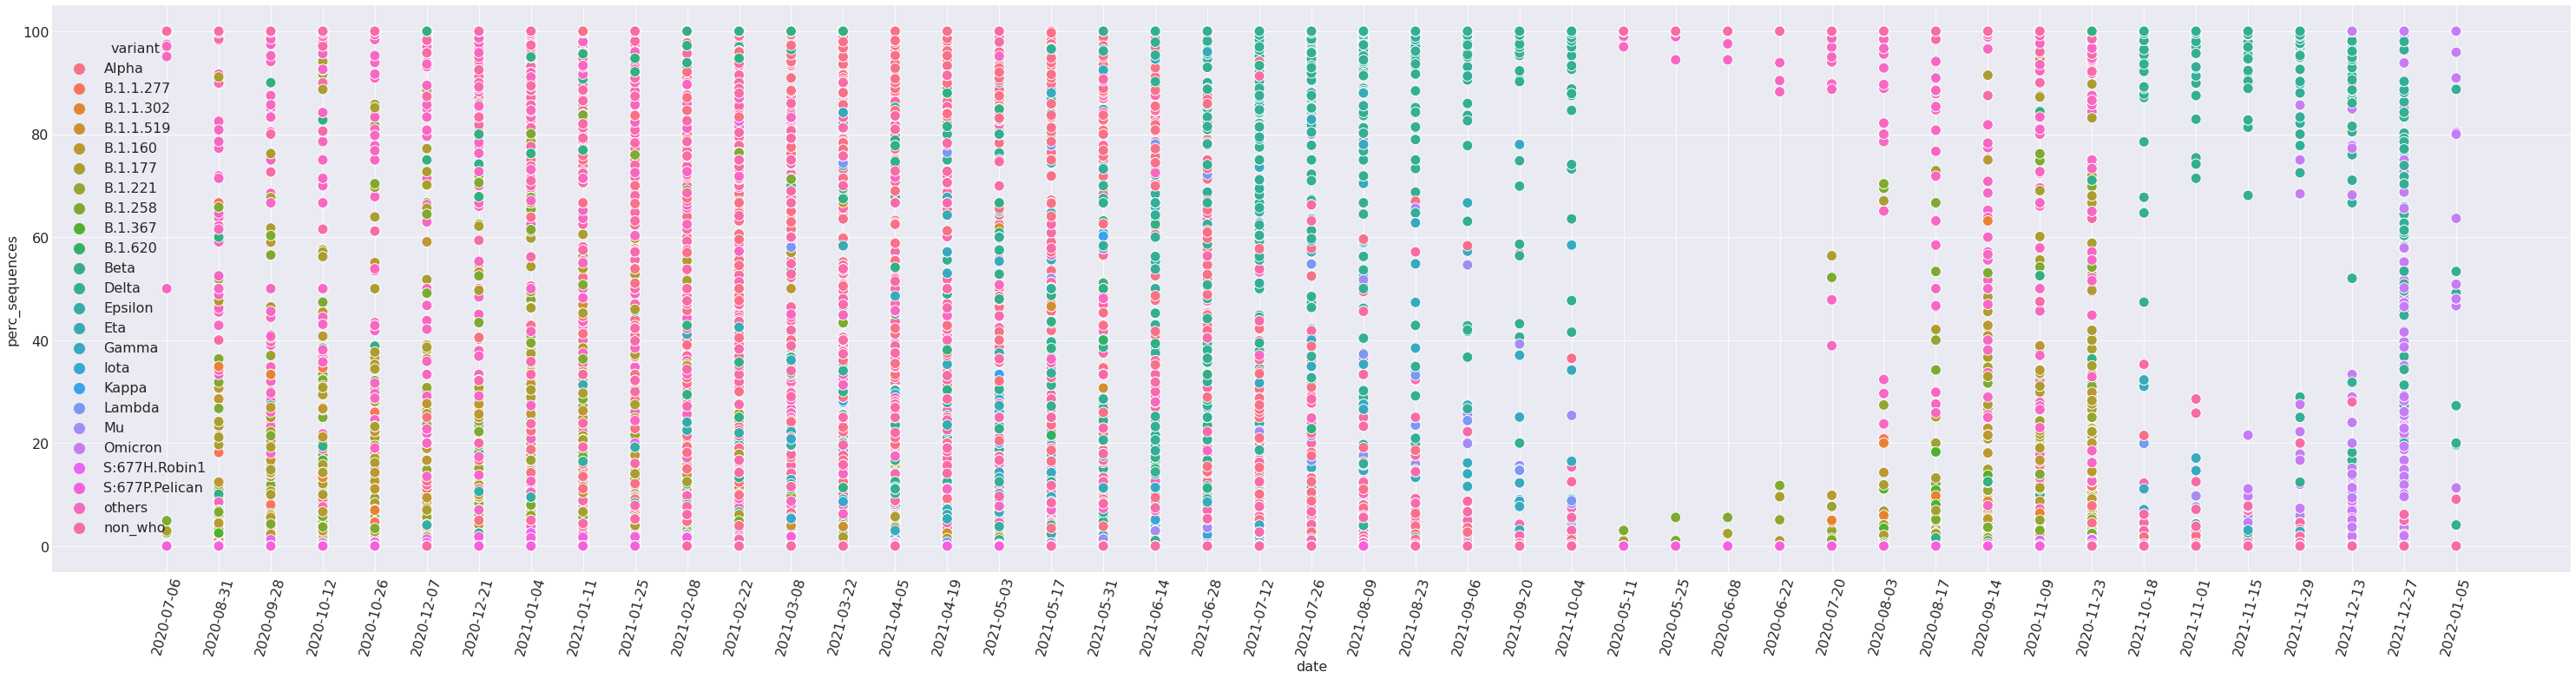

In [10]:
sns.scatterplot(df['date'], df['perc_sequences'], hue=df['variant'])
plt.xticks(rotation=75)
plt.show()

In [24]:
df.groupby(['perc_sequences']).count()

,location,date,variant,num_sequences,num_sequences_total
perc_sequences,,,,,
-0.01,26,26,26,26,26
0.00,84252,84252,84252,84252,84252
0.01,238,238,238,238,238
0.02,176,176,176,176,176
0.03,168,168,168,168,168
...,...,...,...,...,...
99.96,9,9,9,9,9
99.97,5,5,5,5,5
99.98,7,7,7,7,7


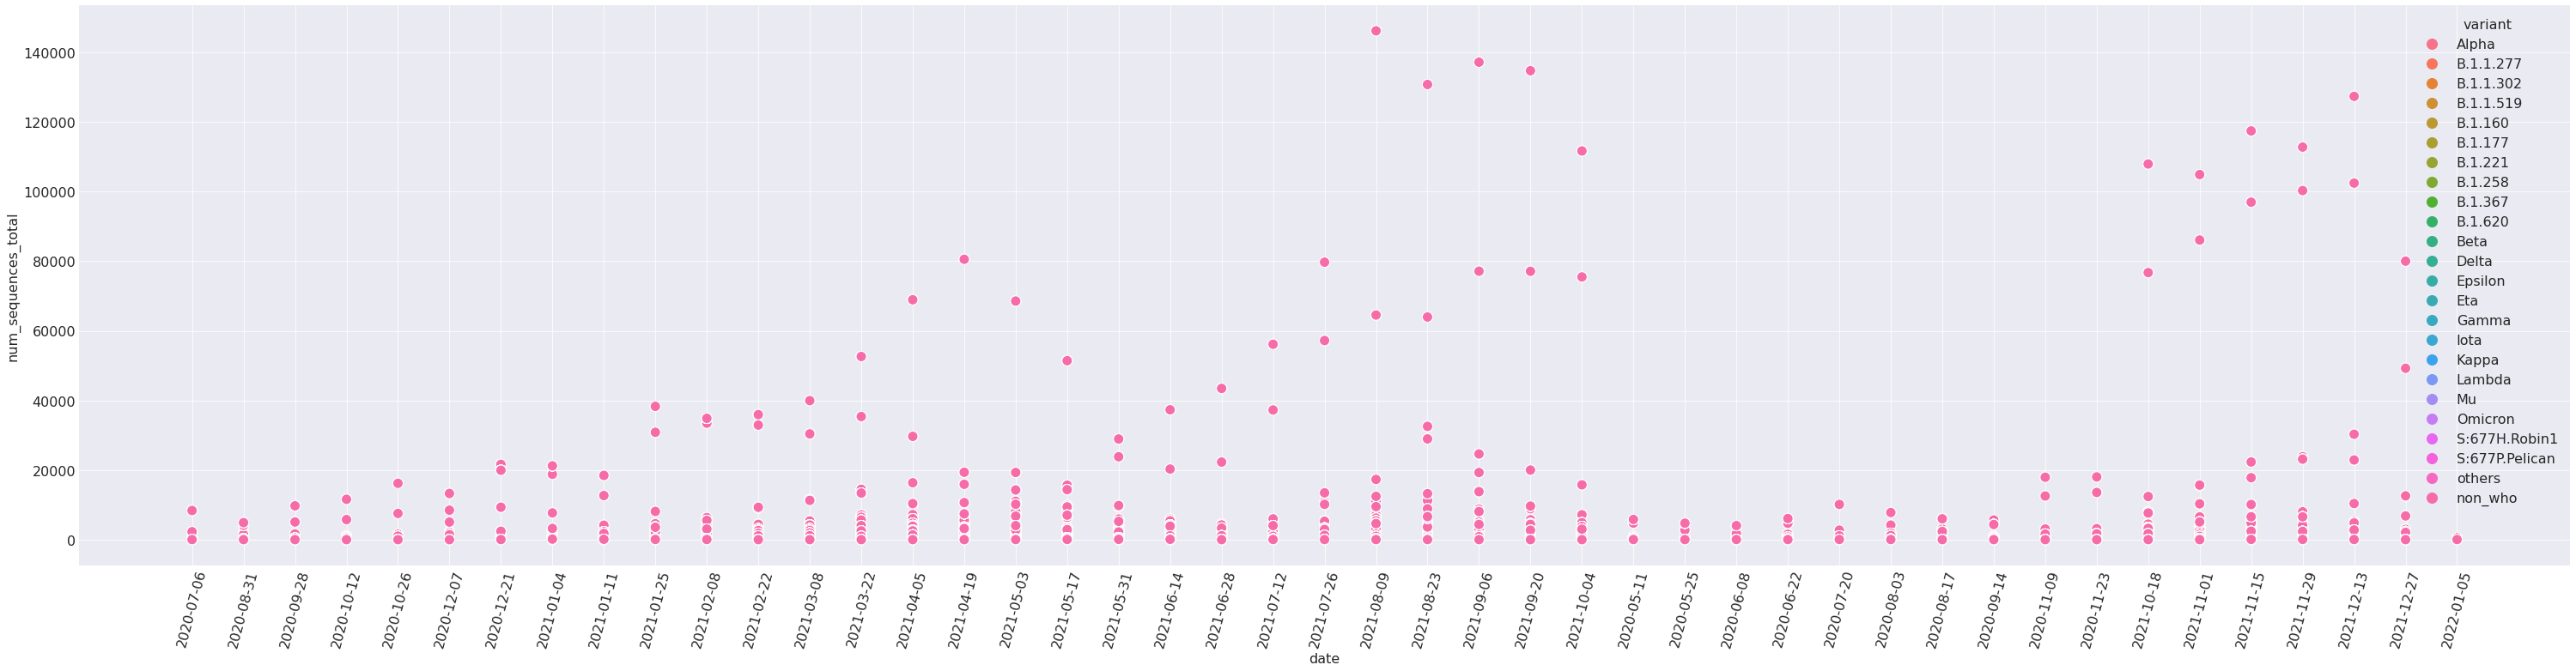

In [25]:
sns.scatterplot(df['date'], df['num_sequences_total'], hue=df['variant'])
plt.xticks(rotation=75)
plt.show()

In [26]:
df.groupby(['num_sequences_total']).count()

,location,date,variant,num_sequences,perc_sequences
num_sequences_total,,,,,
1,4920,4920,4920,4920,4920
2,3624,3624,3624,3624,3624
3,2712,2712,2712,2712,2712
4,2256,2256,2256,2256,2256
5,2040,2040,2040,2040,2040
...,...,...,...,...,...
127342,24,24,24,24,24
130754,24,24,24,24,24
134718,24,24,24,24,24


In [27]:
df.groupby(['location']).count()

,date,variant,num_sequences,perc_sequences,num_sequences_total
location,,,,,
Angola,672,672,672,672,672
Argentina,1056,1056,1056,1056,1056
Aruba,600,600,600,600,600
Australia,1056,1056,1056,1056,1056
Austria,1032,1032,1032,1032,1032
...,...,...,...,...,...
United States,1080,1080,1080,1080,1080
Uruguay,576,576,576,576,576
Vietnam,504,504,504,504,504


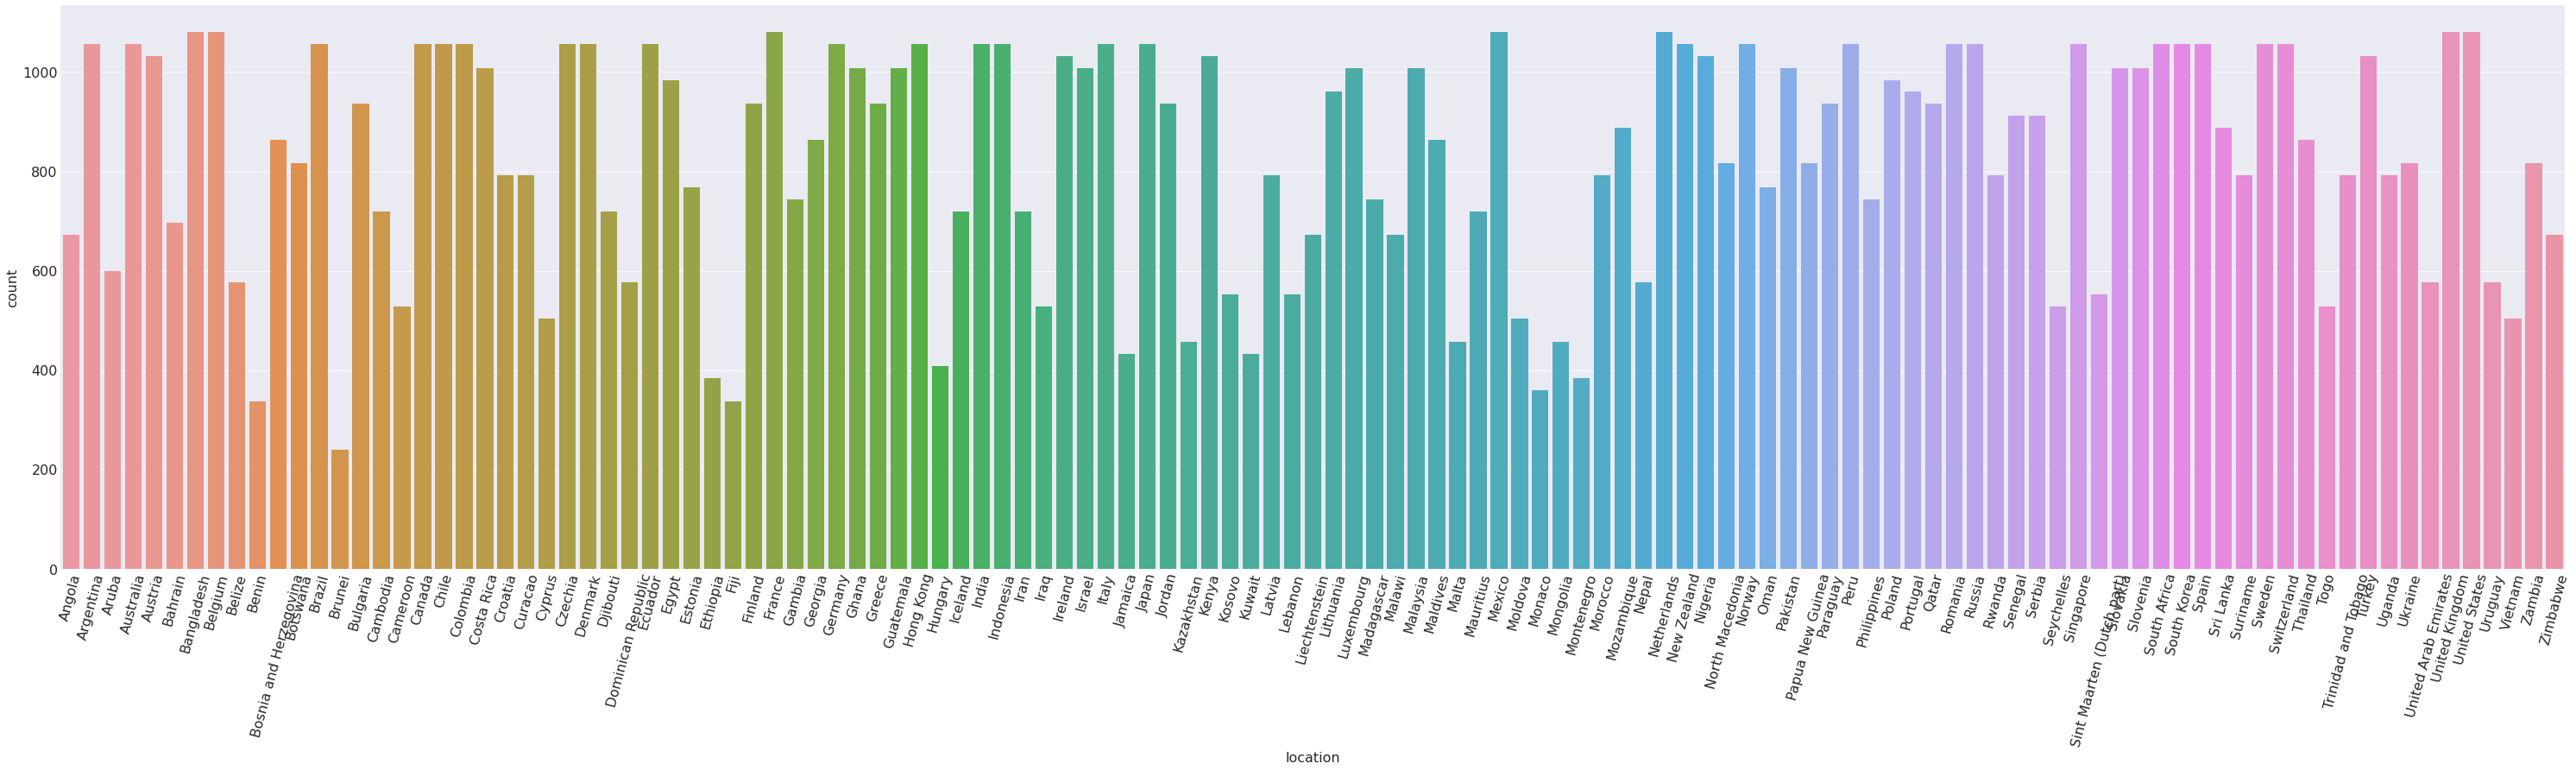

In [15]:
sns.countplot(df['location'])
plt.xticks(rotation=75)
plt.show()

In [16]:
df.groupby(['variant']).count()

,location,date,num_sequences,perc_sequences,num_sequences_total
variant,,,,,
Alpha,4184,4184,4184,4184,4184
B.1.1.277,4184,4184,4184,4184,4184
B.1.1.302,4184,4184,4184,4184,4184
B.1.1.519,4184,4184,4184,4184,4184
B.1.160,4184,4184,4184,4184,4184
B.1.177,4184,4184,4184,4184,4184
B.1.221,4184,4184,4184,4184,4184
B.1.258,4184,4184,4184,4184,4184
B.1.367,4184,4184,4184,4184,4184


In [17]:
px.box(df, y=df['num_sequences'],color='variant', animation_frame=df['date'],template='plotly_dark')

Unsupported

In [18]:
px.line(df, y=df['num_sequences'],color='variant', animation_frame=df['date'],template='plotly_dark')

Unsupported

In [28]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 37.2 MB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595765 sha256=3edbe60b1f090363d16f09809fd5097c90da9bf49e68388aba937014a021bd1e
  Stored in directory: /home/datalore/.cache/pip/wheels/66/06/32/a9179cff2c93a45d140de3a5a4326e9709165681a43ff0f2e7
Successfully built pycountry


In [29]:
import pycountry

input_countries = df['location']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

fig = px.choropleth(df, locations=codes,
                    color='perc_sequences',
                    animation_frame='date',
                    title = "perc_sequences",
                    color_continuous_scale='Bluered',template='plotly_dark')
fig.show()
fig = px.choropleth(df, locations=codes,
                    color='num_sequences',
                    animation_frame='date',
                    title = "num_sequences",
                    color_continuous_scale='Electric',template='plotly_dark')
fig.show()

Unsupported

In [30]:
fig = px.choropleth(df, locations=codes,
                    color='num_sequences_total',
                    animation_frame='date',
                    title = "num_sequences_total",
                    color_continuous_scale='jet',template='plotly_dark')
fig.show()

Unsupported